# Supervised Learning - INN Hotels

### Problem Statement

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impacts a hotel on various fronts:
- Loss of resources (revenue) when the hotel cannot resell the room.
-  Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
-  Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
-  Human resources to make arrangements for the guests.

### Data Dictionary

- Booking_ID: the unique identifier of each booking
- no_of_adults: Number of adults
- no_of_children: Number of Children
- no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- no_of_week_nights: Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel
- type_of_meal_plan: Type of meal plan booked by the customer:
- Not Selected – No meal plan selected
- Meal Plan 1 – Breakfast
- Meal Plan 2 – Half board (breakfast and one other meal)
- Meal Plan 3 – Full board (breakfast, lunch, and dinner)
- required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
- room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels Group
- lead_time: Number of days between the date of booking and the arrival date
- arrival_year: Year of arrival date
- arrival_month: Month of arrival date
- arrival_date: Date of the month
- market_segment_type: Market segment designation.
- repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
- no_of_previous_cancellations: Number of previous bookings that were canceled by the customer before the current booking
- no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer before the current booking
- avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- booking_status: Flag indicating if the booking was canceled or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv("datasets/INNHotelsGroup.csv")

In [3]:
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [4]:
data.shape

(36275, 19)

### Observations

- There are 36275 rows spread across 19 columns 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### Observations

1. Columns - 'Booking_ID','type_of_meal_plan','room_type_reserved','marketsegment_type','booking_status' are of datatype object
2. Columns - 'avg_price_per_room' is of datatype float64
3. Columns - 'no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','required_car_parking_space','lead_time','arrival_year','arrival_month','arrival_date','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','no_of_special_requests' are of datatype int64

We should consider converting column 'required_car_parking_space' to object datatype since it shows whether or not a customer requires a car parking space which has a binary answer and not a numerical answer. 

Also, combining columns - 'arrival_year' ,' arrival_month','arrival_date' into one date column would make much more sense, rather than having three separate columns.

In [6]:
#cleaning of data and converting to appropriate datatypes

#converting 'required_car_parking_space ' column to object datatype
data['required_car_parking_space'] = data['required_car_parking_space'].map({1: 'Yes', 0: 'No'}).astype(object)

#converting 'repeated_guest ' column to object datatype
data['repeated_guest'] = data['repeated_guest'].map({1: 'Yes', 0: 'No'}).astype(object)

#combining columns - 'arrival_year' ,' arrival_month','arrival_date' into one arrival_date column of datatype date
data.rename(columns={'arrival_date': 'day', 'arrival_month': 'month', 'arrival_year': 'year'}, inplace=True)
data['arrival_date'] = pd.to_datetime(data[['year', 'month', 'day']], errors='coerce')
data = data.dropna(subset = ['arrival_date'])
data = data.drop (['year','month','day','Booking_ID'],axis=1)


In [7]:
data.describe(include='all')

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count   36238.000000    36238.000000          36238.000000       36238.000000   
unique           NaN             NaN                   NaN                NaN   
top              NaN             NaN                   NaN                NaN   
freq             NaN             NaN                   NaN                NaN   
mean        1.845301        0.105221              0.810475           2.204206   
min         0.000000        0.000000              0.000000           0.000000   
25%         2.000000        0.000000              0.000000           1.000000   
50%         2.000000        0.000000              1.000000           2.000000   
75%         2.000000        0.000000              2.000000           3.000000   
max         4.000000       10.000000              7.000000          17.000000   
std         0.518572        0.402540              0.870992           1.410784   

       type_of_meal_plan required_car_parking_space room_type_reserved  \
count              36238                      36238              36238   
unique                 4                          2                  7   
top          Meal Plan 1                         No        Room_Type 1   
freq               27802                      35117              28105   
mean                 NaN                        NaN                NaN   
min                  NaN                        NaN                NaN   
25%                  NaN                        NaN                NaN   
50%                  NaN                        NaN                NaN   
75%                  NaN                        NaN                NaN   
max                  NaN                        NaN                NaN   
std                  NaN                        NaN                NaN   

           lead_time market_segment_type repeated_guest  \
count   36238.000000               36238          36238   
unique           NaN                   5              2   
top              NaN              Online             No   
freq             NaN               23194          35312   
mean       85.275070                 NaN            NaN   
min         0.000000                 NaN            NaN   
25%        17.000000                 NaN            NaN   
50%        57.000000                 NaN            NaN   
75%       126.000000                 NaN            NaN   
max       443.000000                 NaN            NaN   
std        85.953561                 NaN            NaN   

        no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
count                   36238.000000                          36238.000000   
unique                           NaN                                   NaN   
top                              NaN                                   NaN   
freq                             NaN                                   NaN   
mean                        0.023346                              0.152961   
min                         0.000000                              0.000000   
25%                         0.000000                              0.000000   
50%                         0.000000                              0.000000   
75%                         0.000000                              0.000000   
max                        13.000000                             58.000000   
std                         0.368483                              1.753366   

        avg_price_per_room  no_of_special_requests booking_status  \
count         36238.000000            36238.000000          36238   
unique                 NaN                     NaN              2   
top                    NaN                     NaN   Not_Canceled   
freq                   NaN                     NaN          24360   
mean            103.437259                0.619957            NaN   
min               0.000000                0.000000            NaN   
25%              

### Observations

1. There are 1.8 on average adults per booking at the hotel.
2. There are 0.1 on average children per booking at the hotel with max of children in one of the booking as 10 children.
3. There are on average 0.8 weekend nights and 2.2 week nights spent per booking with 17 week nights spent at max
4. There are 4 unique type of meals prepared at the hotel ordered by the customers with 'Meal Plan 1' being the most famous with 27802 orders
5. There are 7 different type of rooms offered by the hotel to the customers with Room Type 1 most booked room.
6. Lead-time has max value of 443 days, wherein the customer has booked 443 days in advance while the mean lead time is 85.2 days
7. There are 5 different market segment to which the hotel is offering services with most booking coming in from the online segment.
8. There are 35312 non-repeat guests.
9. There are very less pervious calcellations with 0.02 average cancellations and 0.15  on average bookings not cancelled.
10. The average price of the room across all the rooms is 103.42 euros
11. There are on average 0.6 special requests which the customers have asked for.
12. There are two unique values with respect to the booking_status of the room.
13. Most the bookings did not require a vehicle parking space of count around 35117.
14. The arrival dates are between 01-07-2017 and 31-12-2018.


In [8]:
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
arrival_date                            0
dtype: int64

### Observations

- There are no null values in the any of the columns

In [9]:
data.duplicated().sum()

10273

### Observations

- There are the no duplicate rows in the dataframe, all the rows are unique in itself. 

### EDA Univariate Analysis

In [10]:
#analyzing type_of_meal_plan column 
px.histogram(data,x='type_of_meal_plan')

### Observations

1. There are most number of booking for meal plan 1 therefore, we can keep the kitchen closed for at least meal 3 reducing on the expenses. 
2. There are quite number of people who have not selected any meal plan which needs further investigation

In [11]:
#analyzing room_type_reserved column
px.histogram(data,x='room_type_reserved')

### Observations 

1. Room_Type 1 has most number of bookings.
2. Second-highest is Room-Type 4 in terms of number of bookings
3. Rest of the room types have very few bookings, which requires further investigation whether they are satisfing the needs of the customer.

In [12]:
#analyzing the trends in the market_segment_type
px.histogram(data,x='market_segment_type')

### Observations

1. Online bookings has been the most 
2. Second highest bookings have come in from the offline market segment
3. In order to boost the Corporate and Aviation Market Segments, significant marketing campaigns and partnerships is necessary to tie up with the respective companies in order to gain more orders.

In [13]:
#analyzing the booking_status column in the data
px.histogram(data, x='booking_status')

### Observations

1. There is good of amount of booking which have been canceled which needs further investigation.

In [14]:
#analyzing no_of_adults column
px.histogram(data,x='repeated_guest')

### Observations

1. There are lots of guests which have not repeated us over years, which requires further investigations

In [15]:
px.box(data,x='avg_price_per_room')

### Observations

1. The mean avg_price_per_room is 100 euros
2. There are a lot of outliers in the price which makes sense considering the type of room booked and when the room was booked 

In [16]:
px.histogram(data,x='arrival_date')

### Observations

1. There is an increase in the number of customers for every quarter moving forward.
2. However, there are certain dips in the entire graph, especially towards January when people dont usually go for trips,  therefore, we could keep discounts to attract the customers.

In [17]:
px.scatter(data,x='no_of_previous_cancellations')

### Observations

1. The customer which have done more than 10 cancellations should not be given any money back so that they reduce on the cancellations
2. Customers having more than 3 cancellations should be charged 50% of booking amount so that they also resist from canceling unless absolute emergency.

In [18]:
# analyzing no_of_week_nights column in the data
px.box(data,x='no_of_week_nights')

### Observations

1. The median number of week days is 2 days which is good number of days.
2. The data is slightly right skewed, therefore we do have scope of increasing the number of days customer stays at the hotel.
3. There are certain significant outliers with week days even greater than 8, which requires further investigation.

In [19]:
# analyzing the 'no_of_weekend_nights' column in the data
px.box (data,x='no_of_weekend_nights')

### Observations

1. The median number of weekend nights is 1 night.
2. The data is right skewed, showing there are customers with more than 2 weekend nights as well, therefore we have scope to increase the  number of weekend nights among customers.
3. There are certain outliers with more than 5 weekend nights which requires further investigation.

In [20]:
#checking the outliers in week nights and weekend nights
px.box (data,x='no_of_week_nights')

### Observations

1. Most number of people have booked for 2 no_of_week_nights which is therefore the median.
2. There are good of customers which 1 and 3 no_of_week_nights since that is the lower and upper quartile
3. There no_of_week_nights which greater than 2 weeks which are being treated as outlier which requires further analysis.

### Bivariate and Multivariate analysis

<Axes: xlabel='market_segment_type', ylabel='lead_time'>

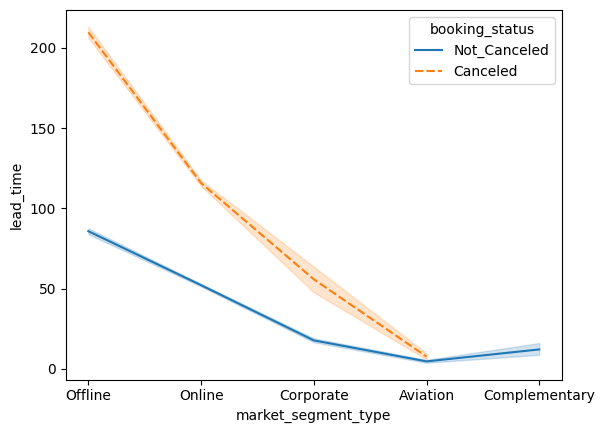

In [21]:
#analyzing the lead_time and market_segment_type over booking status

sns.lineplot(data=data,x='market_segment_type',y='lead_time',hue = 'booking_status', style='booking_status')

### Observations

1. Customers who book offline often have the most lead time and most cancellations, therefore the price for those should be increased so that they decide even before booking so that there is no wastage of resources.
2. For customers who book online have also witnessed more cancellations than bookings, therefore prices need to increased
3. Aviation is minimum on cancellations, therefore this could our target market.

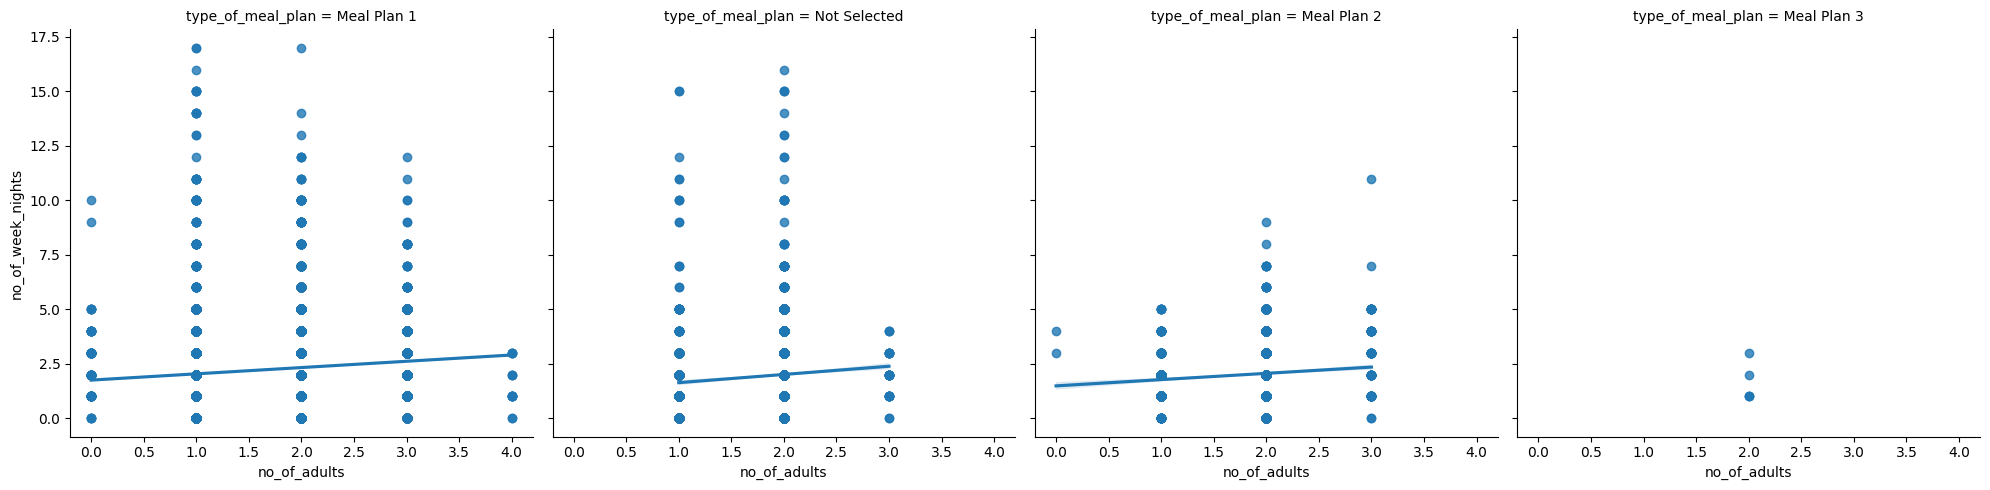

In [22]:
#analyzing no_of_adults and no_of_weekend_nights over type_of_meal_plan
sns.lmplot(data=data,x='no_of_adults',y='no_of_week_nights',col='type_of_meal_plan')

### Observations

1. Consider removing plan-3 since there are very less number of people opting for it. 
2. Market so that customers going ahead with plan-2 which still have less number of customers

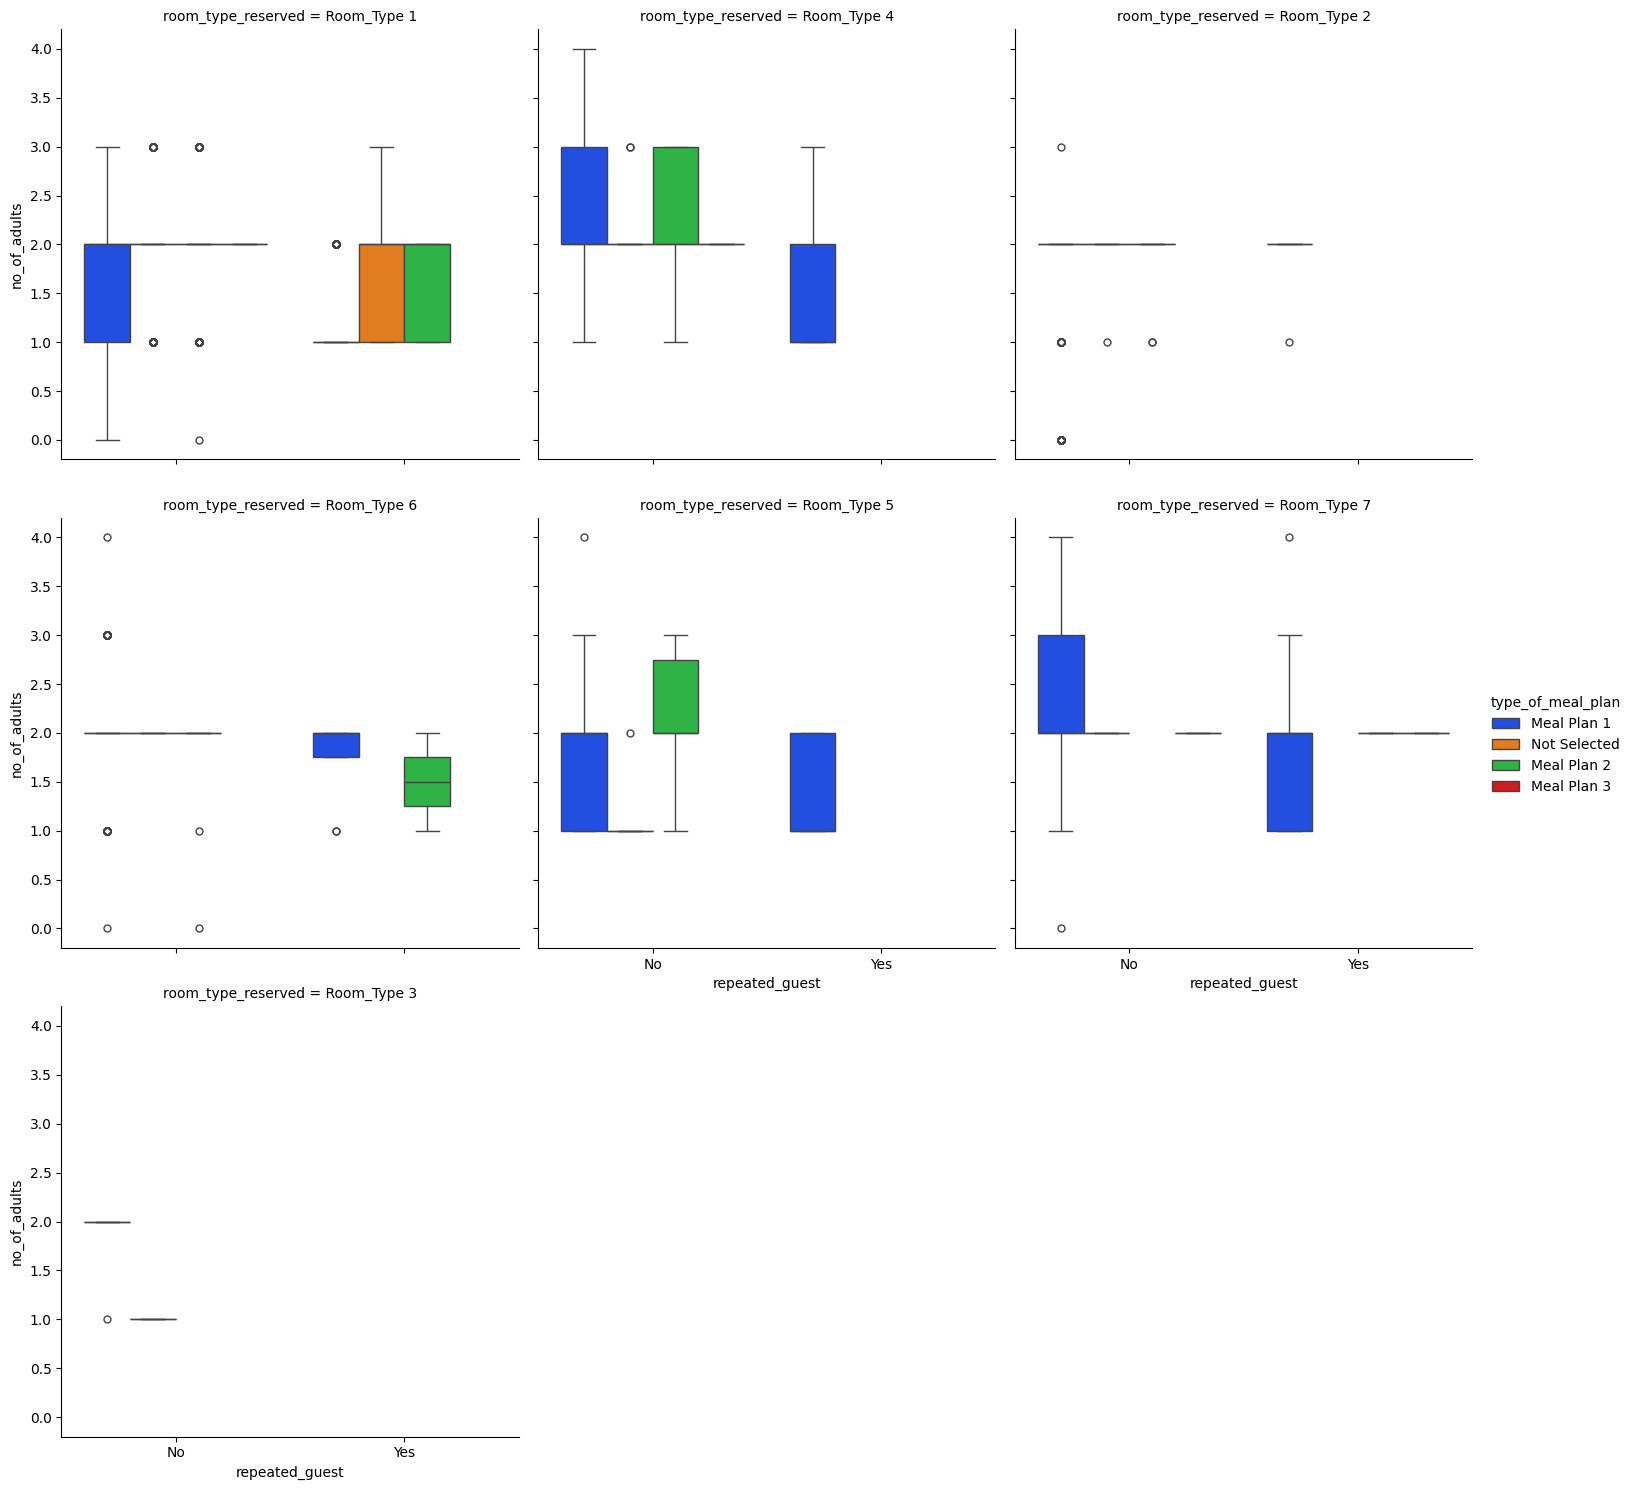

In [23]:
#boxplot to analyze meal plan taken as per room reserved based on no_of_adults
sns.catplot(data=data,x='repeated_guest',y='no_of_adults',hue='type_of_meal_plan',col='room_type_reserved',kind='box',palette='bright',col_wrap=3)

### Observations

1. For Room-type-1 many of the repeated guests have not selected any meal while many have gone ahead with meal plan-2 which can therefore be promoted to guests who have not purchased any meal plan. For non-repeated guests, have mostly gone ahead with the meal plan-1
2. For Room-type-4 and Room-type-5, repeated guests have degraded to choosing just the meal plan-1 while non-repeated guests preferred with meal plan-2 as well.
3. For Room-Type-3 and Room-type-2, there are hardly any customers who chose to have meal plans. In Room-type-3, there are no repeated guests.
4. For Room-type-6, there has been an increase in the meal plan chosen by repeated guests compared to non-repeated guests

<Axes: xlabel='market_segment_type', ylabel='no_of_previous_cancellations'>

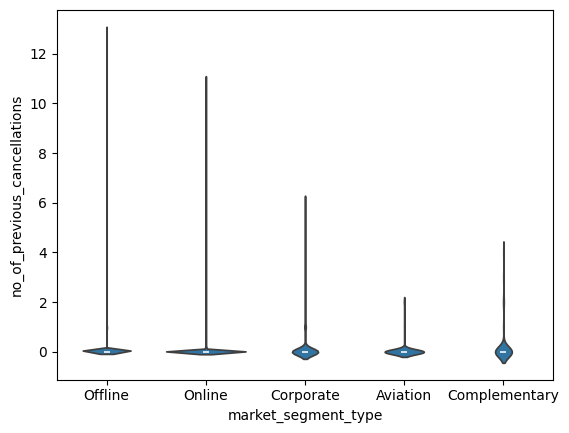

In [24]:
# analyse the adults who have previous cancellations
sns.violinplot(data=data,x='market_segment_type',y='no_of_previous_cancellations')

### Observations

1. There are offline and online segments which have maximum previous cancellations wherein we can increase prices so that there are less cancellations.
2. Avaition has least cancelled market segment which should be our target market.

<Axes: xlabel='no_of_previous_cancellations', ylabel='no_of_week_nights'>

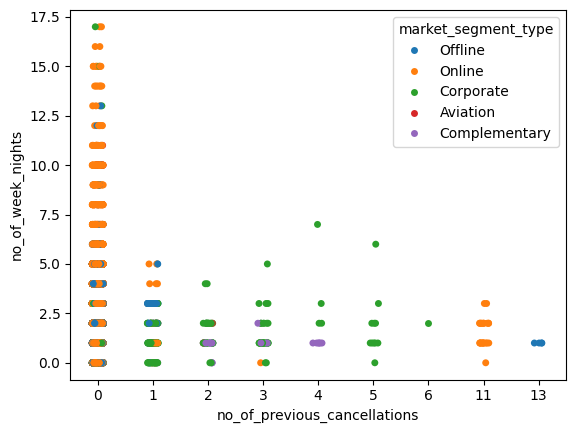

In [25]:
# analyze the market segment having most number of week nights
sns.stripplot(data=data,x='no_of_previous_cancellations',y='no_of_week_nights',hue='market_segment_type',jitter=True)

### Observations

1. There are more number of of week nights of offline segment which have no previous cancellations, therefore cannot be treated as outliers.
2. There are certain corporate bookings which have certain previous cancellations and good number of week nights, therefore these should be treated with a zero refund policy system.

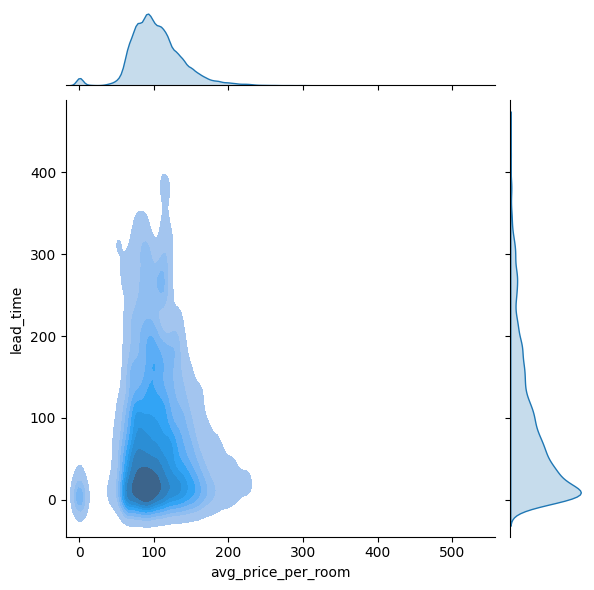

In [26]:
# analyze between avg price per room and lead time
sns.jointplot(data=data,x='avg_price_per_room',y='lead_time',kind='kde',fill=True)

### Observations

1. Customers who are booking room well in advance should be given room at the relatively lower cost.
2. Customers booking room with dates near to the arrival date, should be given rooms at a higher rate so that we can make profits, as there are more customers who book rooms as the dates come closer

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Room_Type 1'),
  Text(1, 0, 'Room_Type 4'),
  Text(2, 0, 'Room_Type 2'),
  Text(3, 0, 'Room_Type 6'),
  Text(4, 0, 'Room_Type 5'),
  Text(5, 0, 'Room_Type 7'),
  Text(6, 0, 'Room_Type 3')])

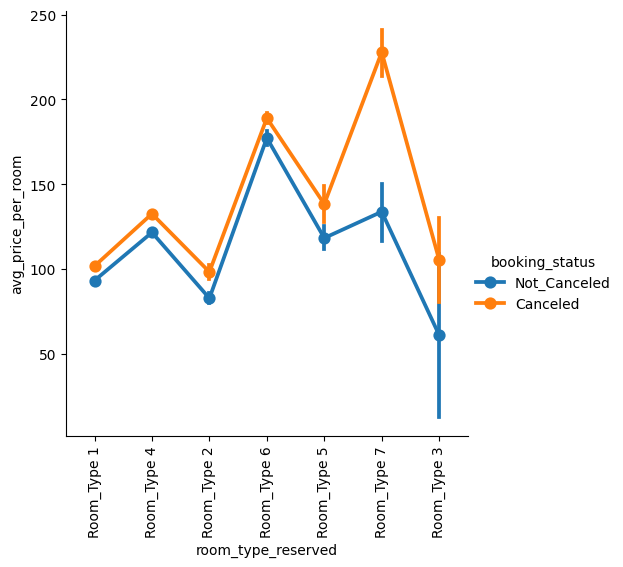

In [27]:
#analyze the avg_price_per_room with the booking status across different types of rooms
sns.catplot(data=data,x='room_type_reserved',y='avg_price_per_room',hue='booking_status',kind='point')
plt.xticks(rotation = 90)

### Observations

1. Room type 7 has seen most cancellations which is most likely due to the price poiint of view, which most likely needs to be reduced to attract more customers
2. Room type 3 also has some cancellations due to pricing, which can also be reduced
3. Rest of the room types have more cancellations than bookings but does not look like due to pricing, therefore does not need to change the pricing.

<Axes: >

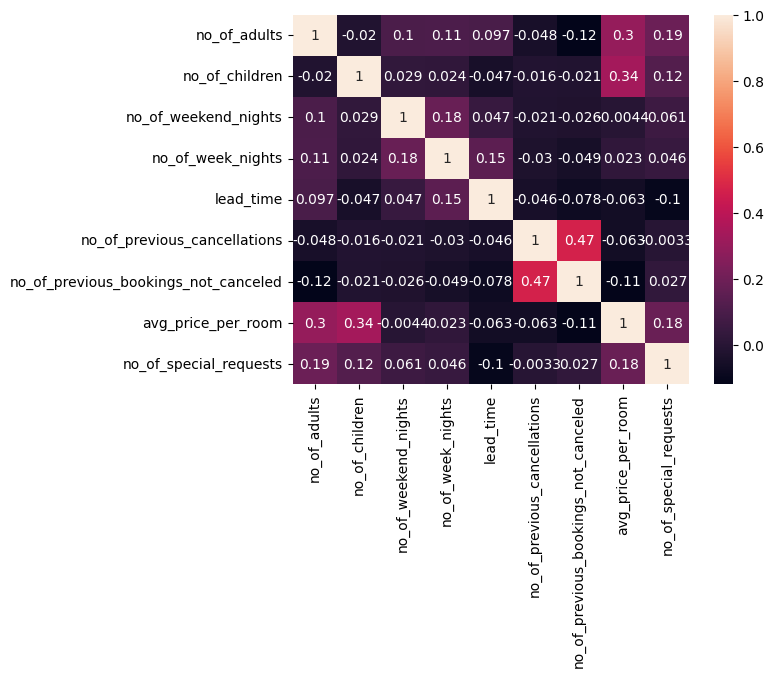

In [28]:
# analyze the correlations between variables
sns.heatmap(data=data[['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','lead_time','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']].corr(),annot=True)

### Observations

1. The avg_price_per_room is pretty positively correlated with no_of_adults and no_of_children.
2. No_of_special_requests is also correlated with the no_of_adults and no_of_children.
3. No_of_previous_bookings_not_canceled is negatively correlated with lead_time and week_nights
4. Avg_price_per_room is negatively correlated with no_of_previous_cancellations and lead_time
5. Most positively correlated is the no_of_previous_cancellation and no_of_previous_bookings_not_canceled

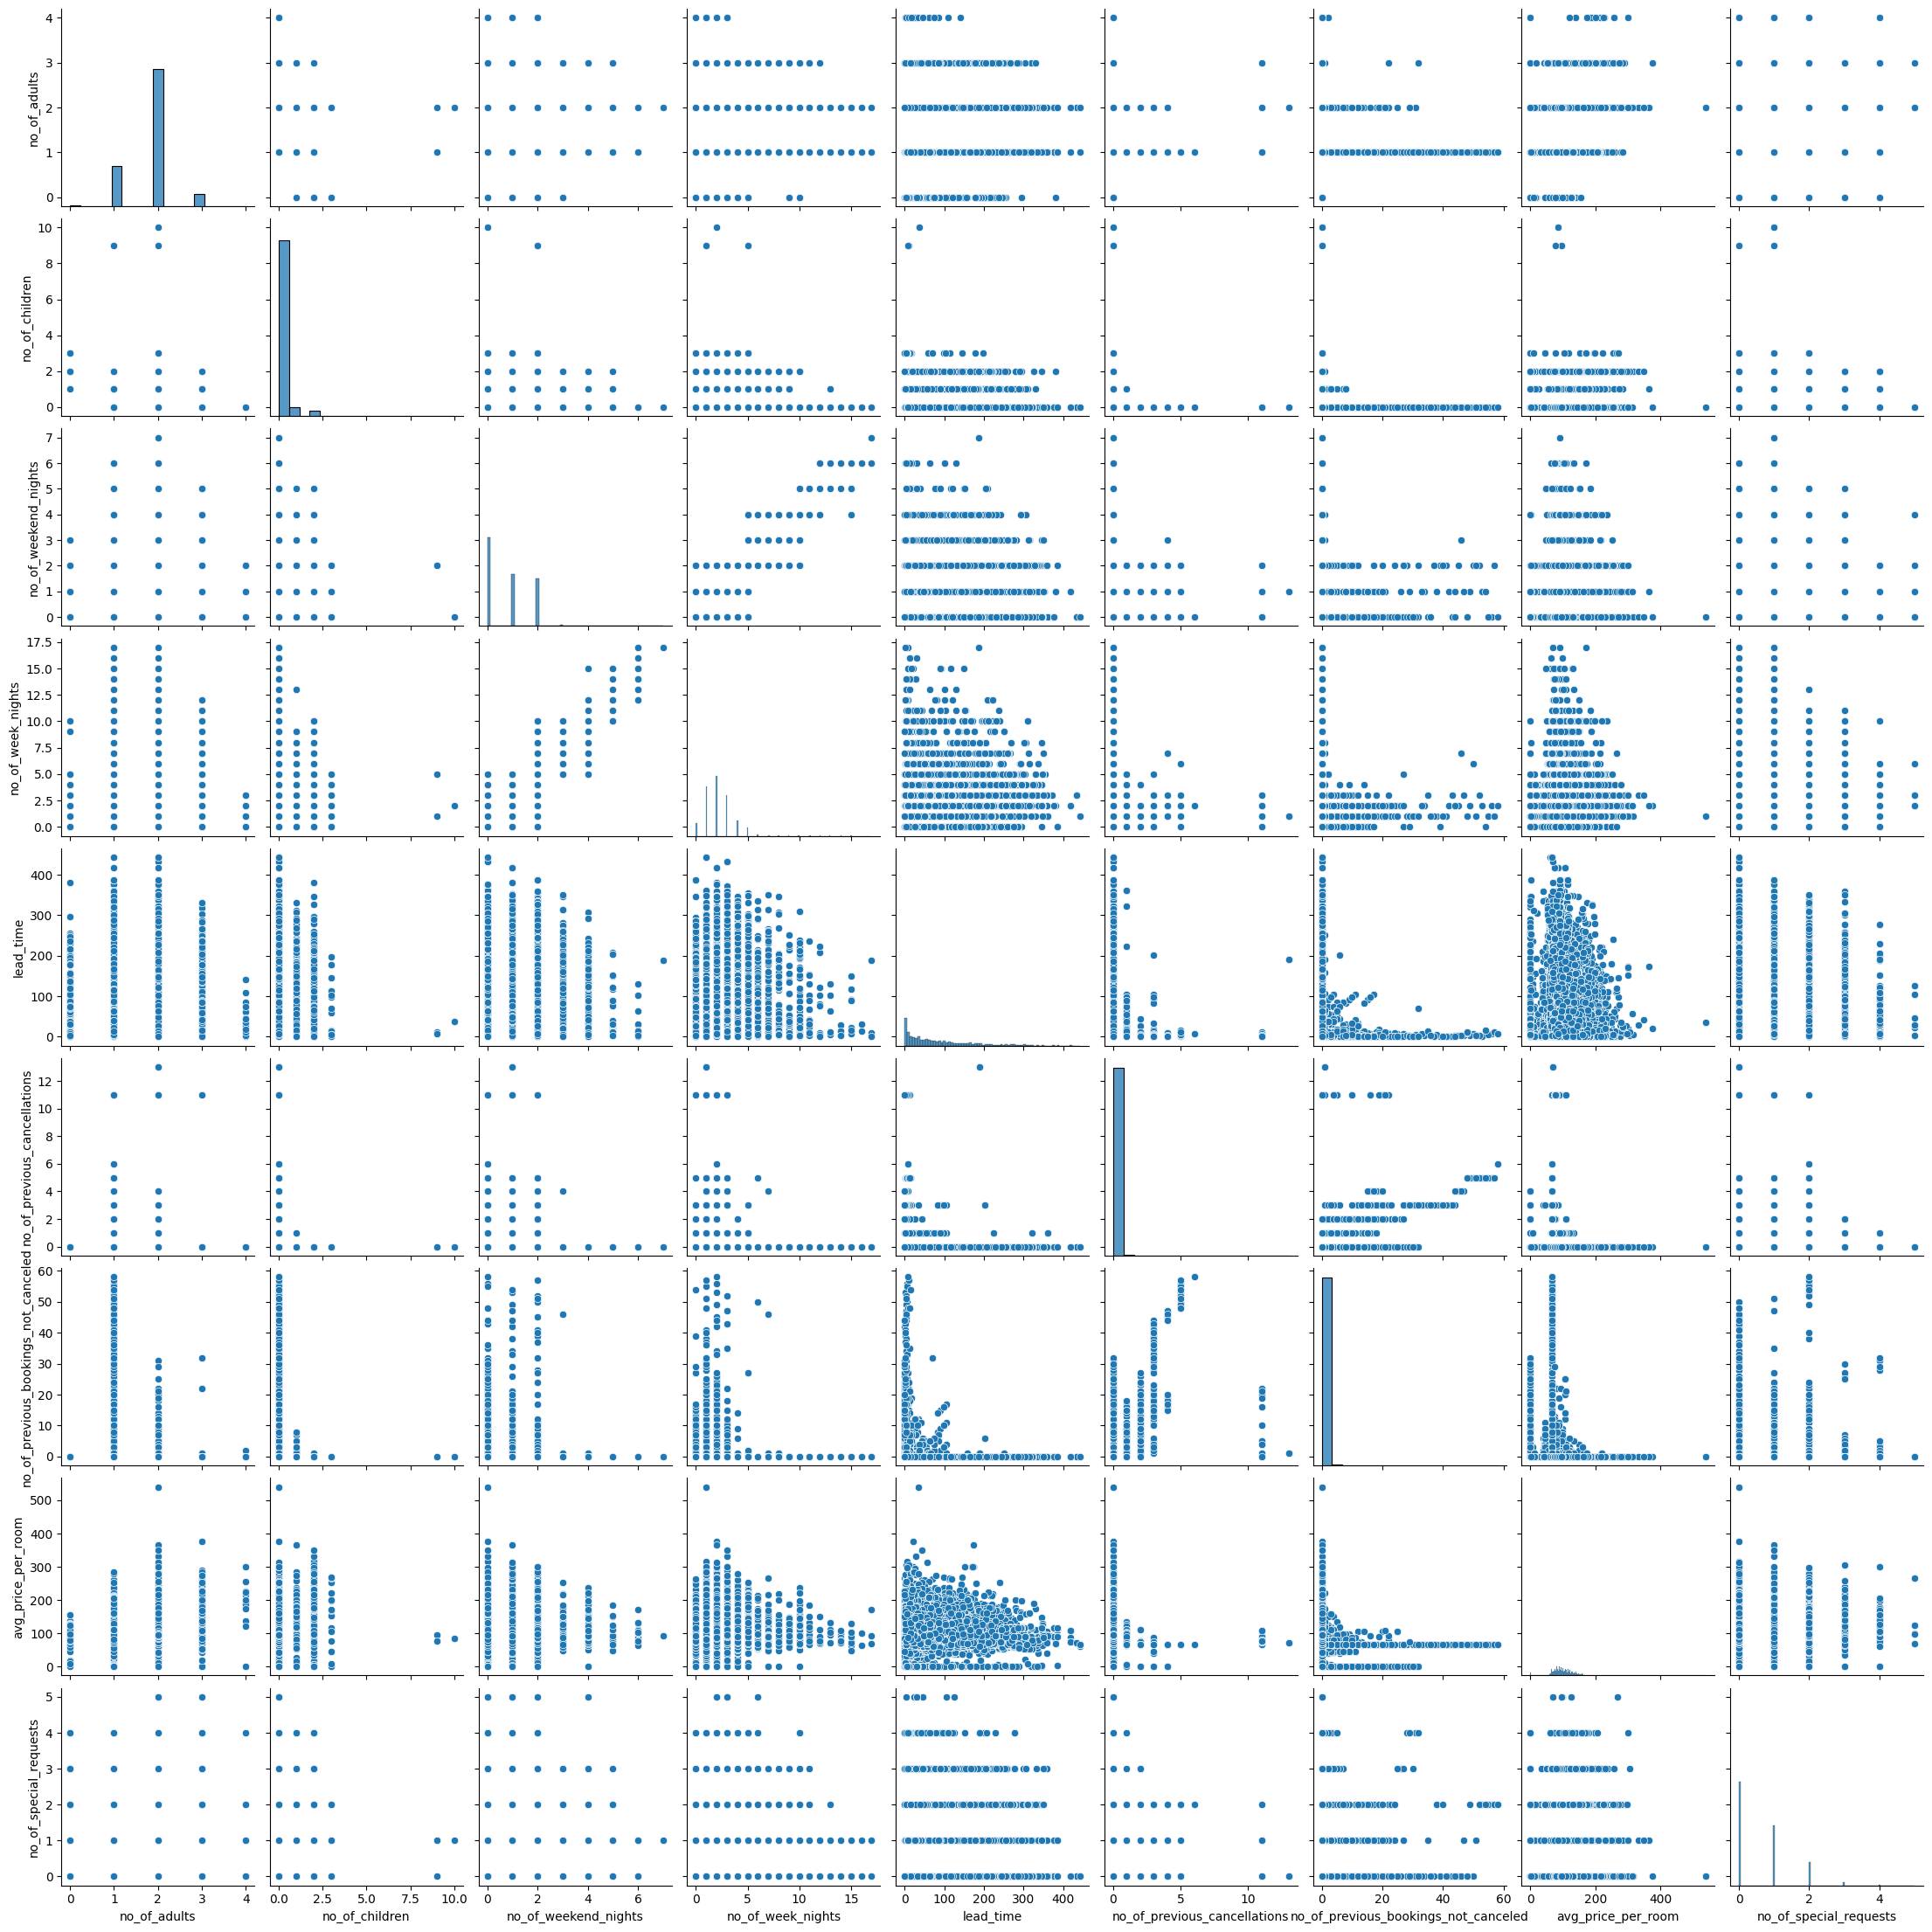

In [29]:
#analyzing the numeric data through pairplots
sns.pairplot(data=data[['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','lead_time','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']])

### Observations

1. There are a lot of people who have small lead time with no previous booking canceled which can be given some incentive so that they could visit again.
2. Those rooms have a lead time of on the higher side tend to have lower average price per room.
3. More are the number of week nights, less is the lead time therefore the price of room can be increased so that we can make more profits

## Data Pre-Processing

- Converting the datetime column of arrival into three columns for year,month and day
- We would be creating dummy variables for categorical values
- We would be using 70% of data for training and 30% for testing

In [30]:
#splitting of data with booking_status as a metric
from sklearn.model_selection import train_test_split


data['year'] = data['arrival_date'].dt.year
data['month'] = data['arrival_date'].dt.month
data['day'] = data['arrival_date'].dt.day

X= data.drop(['booking_status','arrival_date'],axis=1)
Y=data['booking_status']

X = pd.get_dummies(X,drop_first=True)
Y=pd.get_dummies(Y,drop_first=True)

X_train, X_test, y_train,y_test = train_test_split (X,Y,test_size=0.3,random_state=1)
X_train.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
4124              2               0                     0                  1   
31349             3               0                     0                  4   
10601             2               0                     0                  1   
26095             2               0                     0                  4   
9017              2               0                     1                  2   

       lead_time  no_of_previous_cancellations  \
4124         289                             0   
31349        107                             0   
10601          4                             0   
26095         52                             0   
9017         142                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
4124                                      0               67.00   
31349                                     0              152.10   
10601                                     0               90.00   
26095                                     0               63.75   
9017                                      0              125.33   

       no_of_special_requests  year  ...  room_type_reserved_Room_Type 3  \
4124                        0  2017  ...                           False   
31349                       0  2018  ...                           False   
10601                       0  2018  ...                           False   
26095                       0  2018  ...                           False   
9017                        1  2018  ...                           False   

       room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
4124                            False                           False   
31349                            True                           False   
10601                           False                           False   
26095                           False                           False   
9017                            False                           False   

       room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
4124                            False                           False   
31349                           False                           False   
10601                           False                           False   
26095                           False                           False   
9017                            False                           False   

       market_segment_type_Complementary  market_segment_type_Corporate  \
4124                               False                          False   
31349                              False                          False   
10601                              False                          False   
26095                              False                          False   
9017                               False                          False   

       market_segment_type_Offline  market_segment_type_Online  \
4124                          True                       False   
31349                        False                        True   
10601                        False                        True   
26095                        False                        True   
9017                         False                        True   

       repeated_guest_Yes  
4124                False  
31349               False  
10601               False  
26095               False  
9017                False  

[5 rows x 27 columns]

## Model Building

### Logistic Regression

In [31]:
# logistic regression model with booking_status as the classification parameter
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

LR0 = LogisticRegression (random_state=1,solver='liblinear')
LR0.fit (X_train,y_train)


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(random_state=1, solver='liblinear')

In [32]:
#evaluation metrics

#predicting the class probability
pred_temp = (LR0.predict_proba(X_train))[:, 1] > 0.5
pred = np.round(pred_temp)

accuracy = accuracy_score(y_train,pred)
print ("Accuracy:",accuracy)
print ("Recall:",recall_score(y_train,pred))
print ("Precision",precision_score(y_train,pred))
print ("F1-Score:",f1_score(y_train,pred))

Accuracy: 0.8025309469368446
Recall: 0.8920888679910661
Precision 0.8270938913410714
F1-Score: 0.8583627880672982


<Axes: >

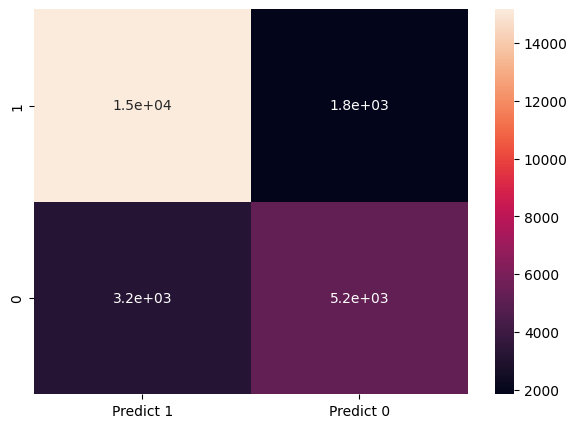

In [33]:
#building the confusion matrix for logisitic regression training data
cm=confusion_matrix(y_train, pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [34]:
y_pred = LR0.predict(X_test)

In [35]:
#evaluation metric for testing data

accuracy = accuracy_score(y_test,y_pred)
print ("Accuracy:",accuracy)
print ("Recall:",recall_score(y_test,y_pred))
print ("Precision",precision_score(y_test,y_pred))
print ("F1-Score:",f1_score(y_test,y_pred))

Accuracy: 0.8004047093451067
Recall: 0.8788456302749795
Precision 0.8345398138572906
F1-Score: 0.8561198780002652


<Axes: >

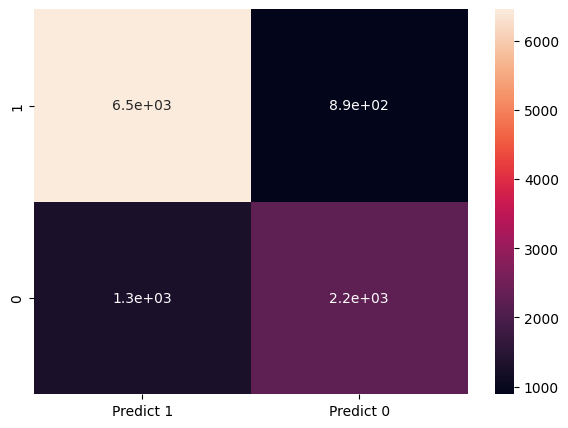

In [36]:
#building the confusion matrix for logisitic regression for testing data
cm=confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### Observations

- The recall and precision for training and testing data is good enough
- The training and testing data weighted recall is close enough indicating that the model is not overfitting

### Naive Bayes

In [37]:
# naive bayes with 'booking status' as classfication parameter
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

NB0 = GaussianNB()
NB0.fit (X_train,y_train)


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GaussianNB()

In [38]:
#evaluation metrics

#predicting the class probability
pred_temp = (NB0.predict_proba(X_train))[:, 1] > 0.5
pred = np.round(pred_temp)

accuracy = accuracy_score(y_train,pred)
print ("Accuracy:",accuracy)
print ("Recall:",recall_score(y_train,pred))
print ("Precision",precision_score(y_train,pred))
print ("F1-Score:",f1_score(y_train,pred))

Accuracy: 0.41153512575888984
Recall: 0.13964970024685552
Precision 0.8915572232645403
F1-Score: 0.24147568474007824


<Axes: >

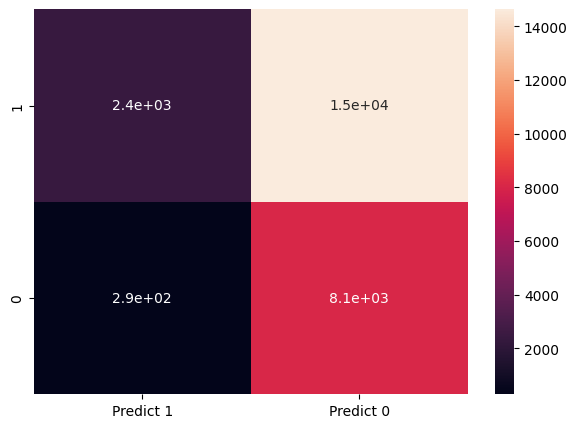

In [39]:
#building the confusion matrix for naive bayes  training data
cm=confusion_matrix(y_train, pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [40]:
y_pred = NB0.predict(X_test)

In [41]:
#evaluation metrics for testing data
print ("Accuracy:",accuracy_score(y_test,y_pred))
print ("Recall:",recall_score(y_test,y_pred))
print ("Precision",precision_score(y_test,y_pred))
print ("F1-Score:",f1_score(y_test,y_pred))

Accuracy: 0.41160779985283297
Recall: 0.1419820310372992
Precision 0.9173262972735268
F1-Score: 0.24590357184958148


<Axes: >

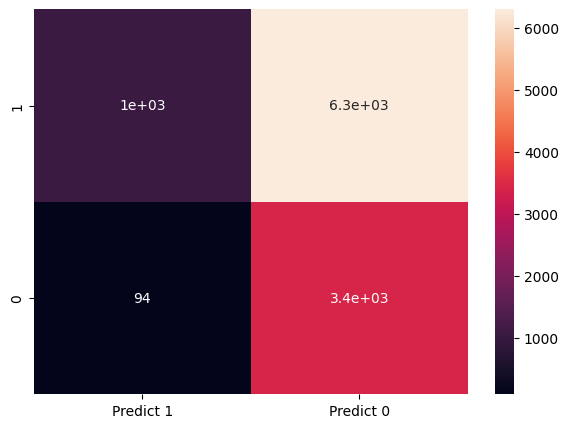

In [42]:
#building the confusion matrix for naive bayes
cm=confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### Observations

- The accuracy for both training and testing data is pretty small
- The recall for training and testing data is also small yet close enough, hence no overfitting.
- The Precision for training and testing data is high enough

### K Nearest Neighbour Classifier

In [43]:
#KNN with classification parameter as 'booking_status'
from sklearn.neighbors import KNeighborsClassifier

KNN0 = KNeighborsClassifier(n_neighbors=3,weights='distance')
KNN0.fit(X_train,y_train)

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier(n_neighbors=3, weights='distance')

In [44]:
#evaluation metrics

#predicting the class probability
pred_temp = (KNN0.predict_proba(X_train))[:, 1] > 0.5
pred = np.round(pred_temp)

accuracy = accuracy_score(y_train,pred)
print ("Accuracy:",accuracy)
print ("Recall:",recall_score(y_train,pred))
print ("Precision",precision_score(y_train,pred))
print ("F1-Score:",f1_score(y_train,pred))

Accuracy: 0.9933375384372782
Recall: 0.9960620665334431
Precision 0.9940172444131621
F1-Score: 0.9950386049379093


<Axes: >

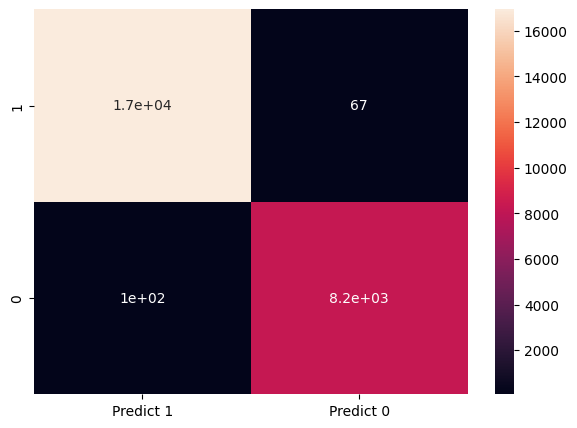

In [45]:
#building the confusion matrix for K Nearest Neighbour Classifier
cm=confusion_matrix(y_train, pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [46]:
y_pred = KNN0.predict(X_test)

In [47]:
#evaluation metrics

accuracy = accuracy_score(y_test,y_pred)
print ("Accuracy:",accuracy)
print ("Recall:",recall_score(y_test,y_pred))
print ("Precision",precision_score(y_test,y_pred))
print ("F1-Score:",f1_score(y_test,y_pred))

Accuracy: 0.8157652685798381
Recall: 0.8770759597059624
Precision 0.8541694286093067
F1-Score: 0.8654711532003492


<Axes: >

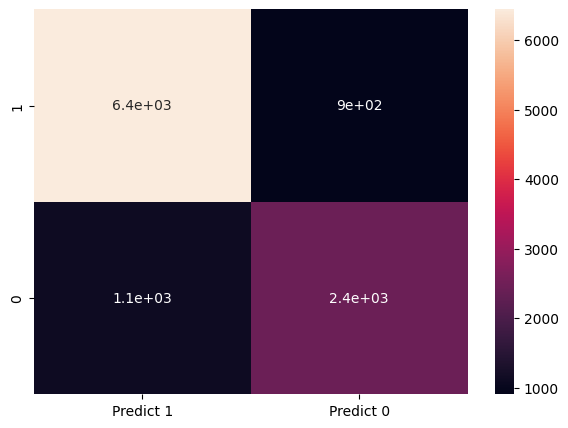

In [48]:
#building the confusion matrix for K Nearest Neighbour Classifier
cm=confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### Observations

- The accuracy for training and testing data is pretty different and so is the recall 
- The recall being not so close, indicates there is some amount of overfitting in this model.

### Support Vector Machines (SVM)

In [49]:
#SVM with classification parameter as 'booking_status'
from sklearn.svm import SVC

SVM0 = SVC(gamma=0.025,C=3,kernel='poly',degree=2,probability=True)
SVM0.fit(X_train,y_train)


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(C=3, degree=2, gamma=0.025, kernel='poly', probability=True)

In [50]:
#evaluation metrics

#predicting the class probability
pred_temp = (SVM0.predict_proba(X_train))[:, 1] > 0.5
pred = np.round(pred_temp)

accuracy = accuracy_score(y_train,pred)
print ("Accuracy:",accuracy)
print ("Recall:",recall_score(y_train,pred))
print ("Precision",precision_score(y_train,pred))
print ("F1-Score:",f1_score(y_train,pred))

Accuracy: 0.8111645509737444
Recall: 0.8996120841659809
Precision 0.8323906895801609
F1-Score: 0.8646969097791085


<Axes: >

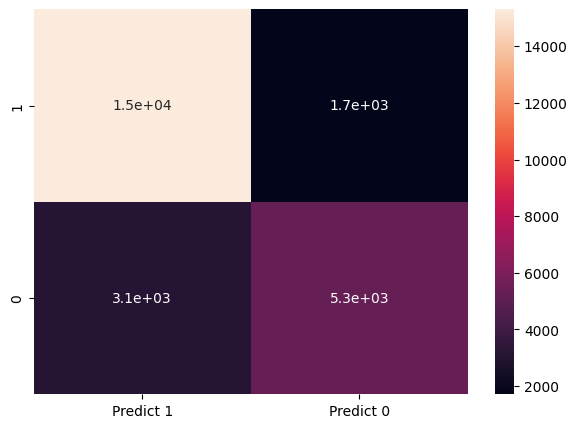

In [51]:
#building the confusion matrix for K Nearest Neighbour Classifier
cm=confusion_matrix(y_train, pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [52]:
y_pred = SVM0.predict(X_test)

In [53]:
#evaluation metrics
accuracy = accuracy_score(y_test,y_pred)
print ("Accuracy:",accuracy)
print ("Recall:",recall_score(y_test,y_pred))
print ("Precision",precision_score(y_test,y_pred))
print ("F1-Score:",f1_score(y_test,y_pred))

Accuracy: 0.8085908756438558
Recall: 0.8872855976041383
Precision 0.8387594904130743
F1-Score: 0.8623404114572997


<Axes: >

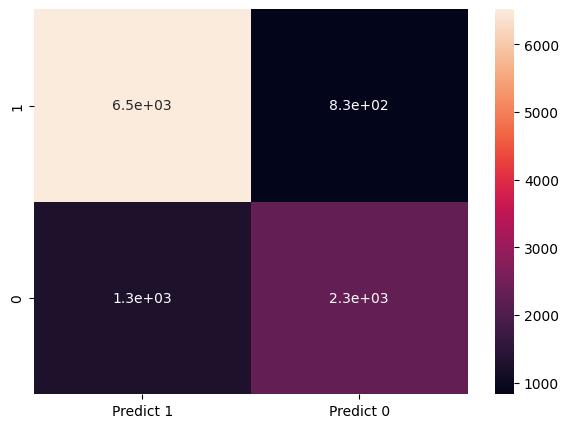

In [54]:
#building the confusion matrix for K Nearest Neighbour Classifier
cm=confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### Observations

- The accuracy for both training and testing data is close enough
- The recall for both training and testing data is close enough indicating no overfitting.

## Model Performance Improvement

###  Logistic Regression

In [55]:
#function for evaluation matrix in training data
def evaluation_training_data_LR (model,X_train,y_train,threshold):

    #predicting the class probability
    pred_temp = (model.predict_proba(X_train))[:, 1] > threshold
    pred = np.round(pred_temp)

    accuracy = accuracy_score(y_train,pred)

    # creating a dataframe of metrics
    evaluation_metrics = pd.DataFrame(
        {"Accuracy": accuracy, "Recall": recall_score(y_train,pred), "Precision": precision_score(y_train,pred), "F1": f1_score(y_train,pred),},
        index=[0],
    )

    return evaluation_metrics


def evaluation_testing_data_LR (model,X_test,y_test,threshold):

    #predicting the class probability
    pred_temp = (model.predict_proba(X_test))[:, 1] > threshold
    pred = np.round(pred_temp)

    accuracy = accuracy_score(y_test,pred)

    # creating a dataframe of metrics
    evaluation_metrics = pd.DataFrame(
        {"Accuracy": accuracy, "Recall": recall_score(y_test,pred), "Precision": precision_score(y_test,pred), "F1": f1_score(y_test,pred),},
        index=[0],
    )

    return evaluation_metrics

In [56]:
#hyperparameter is solver  = 'saga' and random_state =1
LR1 = LogisticRegression (random_state=1,solver='saga')
LR1.fit (X_train,y_train)

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



LogisticRegression(random_state=1, solver='saga')

In [57]:
#hyperparameter is solver="newton-cg" and random_state = 5
LR2 = LogisticRegression (random_state=5,solver='newton-cg')
LR2.fit (X_train,y_train)

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.



LogisticRegression(random_state=5, solver='newton-cg')

In [58]:
#hyerparameter is solver = 'liblinear' and random_state = 5
LR3 = LogisticRegression (random_state=5,solver='liblinear')
LR3.fit (X_train,y_train)

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(random_state=5, solver='liblinear')

In [59]:
#choosing the threshold from the ROC Curve when the hyerparameter is solver  ='liblinear' and random_state=1
from sklearn.metrics import roc_curve
LR4 = LogisticRegression(solver ='liblinear',random_state=1)
LR4.fit(X_train,y_train)

#finding the optimal threshold
fpr,tpr,thresholds = roc_curve(y_train,LR4.predict_proba(X_train)[:,1])
optimal_threshold = np.argmax(tpr - fpr)
optimal_threshold_roc = thresholds[optimal_threshold]
print (optimal_threshold_roc)


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.6866182177101094


In [60]:
#choosing the threshold from the ROC Curve when the hyerparameter is solver  ='liblinear' and random_state=1
from sklearn.metrics import precision_recall_curve
LR5 = LogisticRegression(solver ='liblinear',random_state=1)
LR5.fit(X_train,y_train)


#finding the optimal threshold
y_scores = LR5.predict_proba(X_train)[:, 1]
prec, rec, threshold = precision_recall_curve(y_train, y_scores)
optimal_threshold = np.where((rec == prec) == True)[0][0]
optimal_threshold_prec_rec = threshold[optimal_threshold]
print(optimal_threshold_prec_rec)


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.581814009498757


In [61]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        evaluation_training_data_LR(LR1,X_train,y_train,0.5).T,
        evaluation_training_data_LR(LR2,X_train,y_train,0.5).T,
        evaluation_training_data_LR(LR3,X_train,y_train,0.5).T,
        evaluation_training_data_LR(LR4,X_train,y_train,optimal_threshold_roc).T,
        evaluation_training_data_LR(LR5,X_train,y_train,optimal_threshold_prec_rec).T
    ],
    
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression - solver='saga', random_state=1",
    "Logistic Regression - solver='newton-cg',random_state=5",
    "Logistic Regression - solver='liblinear',random_state=5",
    "Logistic Regression - solver='liblinear',random_state=1 and threshold = 0.68",
    "Logistic Regression - solver='liblinear',random_state=1 and threshold=0.58",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression - solver='saga', random_state=1  \
Accuracy                                            0.766735     
Recall                                              0.905196     
Precision                                           0.781578     
F1                                                  0.838857     

           Logistic Regression - solver='newton-cg',random_state=5  \
Accuracy                                            0.805764         
Recall                                              0.892735         
Precision                                           0.830408         
F1                                                  0.860445         

           Logistic Regression - solver='liblinear',random_state=5  \
Accuracy                                            0.802531         
Recall                                              0.892089         
Precision                                           0.827094         
F1                                                  0.858363         

           Logistic Regression - solver='liblinear',random_state=1 and threshold = 0.68  \
Accuracy                                            0.776433                              
Recall                                              0.771600                              
Precision                                           0.880306                              
F1                                                  0.822376                              

           Logistic Regression - solver='liblinear',random_state=1 and threshold=0.58  
Accuracy                                            0.799929                           
Recall                                              0.850829                           
Precision                                           0.850879                           
F1                                                  0.850854

In [62]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        evaluation_testing_data_LR(LR1,X_test,y_test,0.5).T,
        evaluation_testing_data_LR(LR2,X_test,y_test,0.5).T,
        evaluation_testing_data_LR(LR3,X_test,y_test,0.5).T,
        evaluation_testing_data_LR(LR4,X_test,y_test,optimal_threshold_roc).T,
        evaluation_testing_data_LR(LR5,X_test,y_test,optimal_threshold_prec_rec).T
    ],
    
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression - solver='saga', random_state=1",
    "Logistic Regression - solver='newton-cg',random_state=5",
    "Logistic Regression - solver='liblinear',random_state=5",
    "Logistic Regression - solver='liblinear',random_state=1 and threshold = 0.68",
    "Logistic Regression - solver='liblinear',random_state=1 and threshold=0.58",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Logistic Regression - solver='saga', random_state=1  \
Accuracy                                            0.761405     
Recall                                              0.897767     
Precision                                           0.781583     
F1                                                  0.835656     

           Logistic Regression - solver='newton-cg',random_state=5  \
Accuracy                                            0.804820         
Recall                                              0.882249         
Precision                                           0.837555         
F1                                                  0.859321         

           Logistic Regression - solver='liblinear',random_state=5  \
Accuracy                                            0.800405         
Recall                                              0.878846         
Precision                                           0.834540         
F1                                                  0.856120         

           Logistic Regression - solver='liblinear',random_state=1 and threshold = 0.68  \
Accuracy                                            0.766740                              
Recall                                              0.758100                              
Precision                                           0.880057                              
F1                                                  0.814539                              

           Logistic Regression - solver='liblinear',random_state=1 and threshold=0.58  
Accuracy                                            0.798013                           
Recall                                              0.842499                           
Precision                                           0.856253                           
F1                                                  0.849321

### Observations

-   Logistic Regression with hypermeter of solver = 'newton-cg' and random_state = 5 having training and testing accuracy highest of close to 0.80 and recall is close enough showing no overfitting
- The second best accuracy is with hyperparameter of solver = 'liblinear'

### Support Vector Machine (SVM)

In [63]:
#function for evaluation matrix in training data
def evaluation_training_data_SVM (model,X_train,y_train):

    #predicting the class probability
    pred_temp = model.predict(X_train)
    pred = np.round(pred_temp)

    accuracy = accuracy_score(y_train,pred)

    # creating a dataframe of metrics
    evaluation_metrics = pd.DataFrame(
        {"Accuracy": accuracy, "Recall": recall_score(y_train,pred), "Precision": precision_score(y_train,pred), "F1": f1_score(y_train,pred),},
        index=[0],
    )

    return evaluation_metrics


def evaluation_testing_data_SVM (model,X_test,y_test):

    #predicting the class probability
    pred_temp = model.predict(X_test)
    pred = np.round(pred_temp)

    accuracy = accuracy_score(y_test,pred)

    # creating a dataframe of metrics
    evaluation_metrics = pd.DataFrame(
        {"Accuracy": accuracy, "Recall": recall_score(y_test,pred), "Precision": precision_score(y_test,pred), "F1": f1_score(y_test,pred),},
        index=[0],
    )

    return evaluation_metrics

In [64]:
#hyperparameter is kernel ="linear", C=3, gamma = 0.025
SVM1 = SVC(kernel='linear',C=3,gamma=0.025)
SVM1.fit(X_train,y_train)

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(C=3, gamma=0.025, kernel='linear')

In [65]:
#hyperparameter is kernel ="rbf", C=4, gamma = 0.025
SVM2 = SVC(kernel='rbf',C=4,gamma=0.025)
SVM2.fit(X_train,y_train)

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(C=4, gamma=0.025)

In [66]:
#hyperparameter is kernel ="polynomial", degree = 2
SVM3 = SVC(kernel='poly',degree=2)
SVM3.fit(X_train,y_train)

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(degree=2, kernel='poly')

In [67]:
#hyperparameter is C=2.5, gamma = 0.16
SVM4 = SVC(C=2.5,gamma=0.16)
SVM4.fit(X_train,y_train)

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(C=2.5, gamma=0.16)

In [68]:
#hyperparater is C=0.05, gamma = 0.05
SVM5 = SVC(gamma=0.05,C=0.05)
SVM5.fit(X_train,y_train)

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(C=0.05, gamma=0.05)

In [69]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        evaluation_training_data_SVM(SVM1,X_train,y_train).T,
        evaluation_training_data_SVM(SVM2,X_train,y_train).T,
        evaluation_training_data_SVM(SVM3,X_train,y_train).T,
        evaluation_training_data_SVM(SVM4,X_train,y_train).T,
        evaluation_training_data_SVM(SVM5,X_train,y_train).T
    ],
    
    axis=1,
)
models_train_comp_df.columns = [
    "SVM with kernel ='linear', C=3, gamma = 0.025",
    "SVM with kernel ='rbf', C=4, gamma = 0.025",
    "SVM with kernel ='polynomial', degree = 2",
    "SVM with C=2.5, gamma = 0.16",
    "SVM with C=0.05, gamma = 0.05",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


SVM with kernel ='linear', C=3, gamma = 0.025  \
Accuracy                                        0.804699   
Recall                                          0.883273   
Precision                                       0.835074   
F1                                              0.858498   

           SVM with kernel ='rbf', C=4, gamma = 0.025  \
Accuracy                                     0.958172   
Recall                                       0.987246   
Precision                                    0.952157   
F1                                           0.969384   

           SVM with kernel ='polynomial', degree = 2  \
Accuracy                                    0.763345   
Recall                                      0.929058   
Precision                                   0.767218   
F1                                          0.840418   

           SVM with C=2.5, gamma = 0.16  SVM with C=0.05, gamma = 0.05  
Accuracy                       0.991839                       0.729638  
Recall                         0.996591                       0.999941  
Precision                      0.991289                       0.712736  
F1                             0.993933                       0.832257

In [70]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        evaluation_testing_data_SVM(SVM1,X_test,y_test).T,
        evaluation_testing_data_SVM(SVM2,X_test,y_test).T,
        evaluation_testing_data_SVM(SVM3,X_test,y_test).T,
        evaluation_testing_data_SVM(SVM4,X_test,y_test).T,
        evaluation_testing_data_SVM(SVM5,X_test,y_test).T
    ],
    
    axis=1,
)
models_test_comp_df.columns = [
     "SVM with kernel ='linear', C=3, gamma = 0.025",
    "SVM with kernel ='rbf', C=4, gamma = 0.025",
    "SVM with kernel ='polynomial', degree = 2",
    "SVM with C=2.5, gamma = 0.16",
    "SVM with C=0.05, gamma = 0.05",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


SVM with kernel ='linear', C=3, gamma = 0.025  \
Accuracy                                        0.801508   
Recall                                          0.873264   
Precision                                       0.839440   
F1                                              0.856018   

           SVM with kernel ='rbf', C=4, gamma = 0.025  \
Accuracy                                     0.829654   
Recall                                       0.903077   
Precision                                    0.853357   
F1                                           0.877513   

           SVM with kernel ='polynomial', degree = 2  \
Accuracy                                    0.760578   
Recall                                      0.922271   
Precision                                   0.769274   
F1                                          0.838853   

           SVM with C=2.5, gamma = 0.16  SVM with C=0.05, gamma = 0.05  
Accuracy                       0.810798                       0.732156  
Recall                         0.956575                       1.000000  
Precision                      0.801711                       0.716124  
F1                             0.872323                       0.834583

### Observations

- SVM with kernel ='rbf' C=2.5 and gamma = 0.16 has a quite different training recall and testing recall suggesting that there is some amount of overfitting 
- SVM with C=2.5 and gamma = 0.16 has quite close recall suggesting no overfitting and good amount of testing accuracy of 0.81 and training accuracy of 0.99

### K Nearest Neighbours

In [71]:
#function for evaluation matrix in training data
def evaluation_training_data_KNN (model,X_train,y_train):

    #predicting the class probability
    pred_temp = model.predict(X_train)
    pred = np.round(pred_temp)

    accuracy = accuracy_score(y_train,pred)

    # creating a dataframe of metrics
    evaluation_metrics = pd.DataFrame(
        {"Accuracy": accuracy, "Recall": recall_score(y_train,pred), "Precision": precision_score(y_train,pred), "F1": f1_score(y_train,pred),},
        index=[0],
    )

    return evaluation_metrics


def evaluation_testing_data_KNN (model,X_test,y_test):

    #predicting the class probability
    pred_temp = model.predict(X_test)
    pred = np.round(pred_temp)

    accuracy = accuracy_score(y_test,pred)

    # creating a dataframe of metrics
    evaluation_metrics = pd.DataFrame(
        {"Accuracy": accuracy, "Recall": recall_score(y_test,pred), "Precision": precision_score(y_test,pred), "F1": f1_score(y_test,pred),},
        index=[0],
    )

    return evaluation_metrics

In [72]:
#hyperparameter is n_neighbours = 10, metric = 'euclidean', weights='distance'
KNN1 = KNeighborsClassifier(n_neighbors=10,metric='euclidean',weights='distance')
KNN1.fit(X_train,y_train)

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier(metric='euclidean', n_neighbors=10, weights='distance')

In [73]:
#hyperparameter is n_neighbours = 7, metric = 'minkowski', weights='distance'
KNN2 = KNeighborsClassifier(n_neighbors=7,metric='minkowski',weights='distance')
KNN2.fit(X_train,y_train)

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier(n_neighbors=7, weights='distance')

In [74]:
#hyperparameter is n_neighbours = 5, metric = 'cosine', weights='distance'
KNN3 = KNeighborsClassifier(n_neighbors=5,metric='cosine',weights='distance')
KNN3.fit(X_train,y_train)

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier(metric='cosine', weights='distance')

In [75]:
#hyperparameter is n_neighbours = 5, metric = 'euclidean', weights='distance'
KNN4 = KNeighborsClassifier(n_neighbors=5,metric='euclidean',weights='distance')
KNN4.fit(X_train,y_train)

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier(metric='euclidean', weights='distance')

In [82]:
#hyperparameter is n_neighbours = 5, metric = 'manhattan', weights='distance'
KNN5= KNeighborsClassifier(n_neighbors=5,metric='manhattan',weights='distance')
KNN5.fit(X_train,y_train)

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier(metric='manhattan', weights='distance')

In [83]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        evaluation_training_data_KNN(KNN1,X_train,y_train).T,
        evaluation_training_data_KNN(KNN2,X_train,y_train).T,
        evaluation_training_data_KNN(KNN3,X_train,y_train).T,
        evaluation_training_data_KNN(KNN4,X_train,y_train).T,
        evaluation_training_data_KNN(KNN5,X_train,y_train).T
    ],
    
    axis=1,
)
models_train_comp_df.columns = [
    "KNN with n_neighbours = 10, metric = 'euclidean', weights='distance'",
    "KNN with n_neighbours = 7, metric = 'minkowski', weights='distance'",
    "KNN with n_neighbours = 5, metric = 'cosine', weights='distance'",
    "KNN with n_neighbours = 5, metric = 'euclidean', weights='distance'",
    "KNN with n_neighbours = 5, metric = 'manhattan', weights='distance'",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


KNN with n_neighbours = 10, metric = 'euclidean', weights='distance'  \
Accuracy                                            0.994284                      
Recall                                              0.996238                      
Precision                                           0.995244                      
F1                                                  0.995741                      

           KNN with n_neighbours = 7, metric = 'minkowski', weights='distance'  \
Accuracy                                            0.994047                     
Recall                                              0.996415                     
Precision                                           0.994719                     
F1                                                  0.995566                     

           KNN with n_neighbours = 5, metric = 'cosine', weights='distance'  \
Accuracy                                            0.994244                  
Recall                                              0.996238                  
Precision                                           0.995186                  
F1                                                  0.995712                  

           KNN with n_neighbours = 5, metric = 'euclidean', weights='distance'  \
Accuracy                                            0.993968                     
Recall                                              0.996121                     
Precision                                           0.994893                     
F1                                                  0.995506                     

           KNN with n_neighbours = 5, metric = 'manhattan', weights='distance'  
Accuracy                                            0.993968                    
Recall                                              0.996121                    
Precision                                           0.994893                    
F1                                                  0.995506

In [84]:
# testing performance comparison

models_train_comp_df = pd.concat(
    [
        evaluation_testing_data_KNN(KNN1,X_test,y_test).T,
        evaluation_testing_data_KNN(KNN2,X_test,y_test).T,
        evaluation_testing_data_KNN(KNN3,X_test,y_test).T,
        evaluation_testing_data_KNN(KNN4,X_test,y_test).T,
        evaluation_testing_data_KNN(KNN5,X_test,y_test).T
    ],
    
    axis=1,
)
models_test_comp_df.columns = [
    "KNN with n_neighbours = 10, metric = 'euclidean', weights='distance'",
    "KNN with n_neighbours = 7, metric = 'minkowski', weights='distance'",
    "KNN with n_neighbours = 5, metric = 'cosine', weights='distance'",
    "KNN with n_neighbours = 5, metric = 'euclidean', weights='distance'",
    "KNN with n_neighbours = 5, metric = 'manhattan', weights='distance'",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


KNN with n_neighbours = 10, metric = 'euclidean', weights='distance'  \
Accuracy                                            0.801508                      
Recall                                              0.873264                      
Precision                                           0.839440                      
F1                                                  0.856018                      

           KNN with n_neighbours = 7, metric = 'minkowski', weights='distance'  \
Accuracy                                            0.829654                     
Recall                                              0.903077                     
Precision                                           0.853357                     
F1                                                  0.877513                     

           KNN with n_neighbours = 5, metric = 'cosine', weights='distance'  \
Accuracy                                            0.760578                  
Recall                                              0.922271                  
Precision                                           0.769274                  
F1                                                  0.838853                  

           KNN with n_neighbours = 5, metric = 'euclidean', weights='distance'  \
Accuracy                                            0.810798                     
Recall                                              0.956575                     
Precision                                           0.801711                     
F1                                                  0.872323                     

           KNN with n_neighbours = 5, metric = 'manhattan', weights='distance'  
Accuracy                                            0.732156                    
Recall                                              1.000000                    
Precision                                           0.716124                    
F1                                                  0.834583

### Observations

1.  KNN with n_neigbours = 5, distance metric = "euclidean", weights = "distance" has a recall of 0.95 in testing and 0.99 recall in training which is close enough so say that it is not overfitting and has a testing accuracy of 0.81.
2. Rest of the KNN algorithms have a difference between recall in the testing and training showing overfitting.

### Insights and Recommendations

### Choosing of the best model

In [86]:
#function for evaluation matrix in training data
def evaluation_training_data_KNN (model,X_train,y_train):

    #predicting the class probability
    pred_temp = model.predict(X_train)
    pred = np.round(pred_temp)

    accuracy = accuracy_score(y_train,pred)

    # creating a dataframe of metrics
    evaluation_metrics = pd.DataFrame(
        {"Accuracy": accuracy, "Recall": recall_score(y_train,pred), "Precision": precision_score(y_train,pred), "F1": f1_score(y_train,pred),},
        index=[0],
    )

    return evaluation_metrics


def evaluation_testing_data_KNN (model,X_test,y_test):

    #predicting the class probability
    pred_temp = model.predict(X_test)
    pred = np.round(pred_temp)

    accuracy = accuracy_score(y_test,pred)

    # creating a dataframe of metrics
    evaluation_metrics = pd.DataFrame(
        {"Accuracy": accuracy, "Recall": recall_score(y_test,pred), "Precision": precision_score(y_test,pred), "F1": f1_score(y_test,pred),},
        index=[0],
    )

    return evaluation_metrics

#function for evaluation matrix in training data
def evaluation_training_data_SVM (model,X_train,y_train):

    #predicting the class probability
    pred_temp = model.predict(X_train)
    pred = np.round(pred_temp)

    accuracy = accuracy_score(y_train,pred)

    # creating a dataframe of metrics
    evaluation_metrics = pd.DataFrame(
        {"Accuracy": accuracy, "Recall": recall_score(y_train,pred), "Precision": precision_score(y_train,pred), "F1": f1_score(y_train,pred),},
        index=[0],
    )

    return evaluation_metrics


def evaluation_testing_data_SVM (model,X_test,y_test):

    #predicting the class probability
    pred_temp = model.predict(X_test)
    pred = np.round(pred_temp)

    accuracy = accuracy_score(y_test,pred)

    # creating a dataframe of metrics
    evaluation_metrics = pd.DataFrame(
        {"Accuracy": accuracy, "Recall": recall_score(y_test,pred), "Precision": precision_score(y_test,pred), "F1": f1_score(y_test,pred),},
        index=[0],
    )

    return evaluation_metrics

#function for evaluation matrix in training data
def evaluation_training_data_LR_NB (model,X_train,y_train,threshold):

    #predicting the class probability
    pred_temp = (model.predict_proba(X_train))[:, 1] > threshold
    pred = np.round(pred_temp)

    accuracy = accuracy_score(y_train,pred)

    # creating a dataframe of metrics
    evaluation_metrics = pd.DataFrame(
        {"Accuracy": accuracy, "Recall": recall_score(y_train,pred), "Precision": precision_score(y_train,pred), "F1": f1_score(y_train,pred),},
        index=[0],
    )

    return evaluation_metrics


def evaluation_testing_data_LR_NB (model,X_test,y_test,threshold):

    #predicting the class probability
    pred_temp = (model.predict_proba(X_test))[:, 1] > threshold
    pred = np.round(pred_temp)

    accuracy = accuracy_score(y_test,pred)

    # creating a dataframe of metrics
    evaluation_metrics = pd.DataFrame(
        {"Accuracy": accuracy, "Recall": recall_score(y_test,pred), "Precision": precision_score(y_test,pred), "F1": f1_score(y_test,pred),},
        index=[0],
    )

    return evaluation_metrics


In [85]:
#K-Nearest Neighbours
KNN_final = KNeighborsClassifier(n_neighbors=5,metric='euclidean',weights='distance')
KNN_final.fit(X_train,y_train)

#Support Vector Machine
SVM_final = SVC(kernel='rbf',C=4,gamma=0.025)
SVM_final.fit(X_train,y_train)

#Logisitic Regression
LR_final = LogisticRegression (random_state=5,solver='newton-cg')
LR_final.fit (X_train,y_train)

#Naive Bayes
NB_final = GaussianNB()
NB_final.fit (X_train,y_train)

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

c:\

GaussianNB()

In [87]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        evaluation_training_data_KNN(KNN_final,X_train,y_train).T,
        evaluation_training_data_SVM(SVM_final,X_train,y_train).T,
        evaluation_training_data_LR_NB(LR_final,X_train,y_train,0.5).T,
        evaluation_training_data_LR_NB(NB_final,X_train,y_train,0.5).T,
    ],
    
    axis=1,
)
models_train_comp_df.columns = [
    "KNN with n_neighbours = 5, metric = 'euclidean', weights='distance'",
    "SVM with kernel= 'rbf', C=4, gamma =0.025",
    "LR with solver='newton-cg, random-state=5,threshold=0.5",
    "NB"
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


KNN with n_neighbours = 5, metric = 'euclidean', weights='distance'  \
Accuracy                                            0.993968                     
Recall                                              0.996121                     
Precision                                           0.994893                     
F1                                                  0.995506                     

           SVM with kernel= 'rbf', C=4, gamma =0.025  \
Accuracy                                    0.958172   
Recall                                      0.987246   
Precision                                   0.952157   
F1                                          0.969384   

           LR with solver='newton-cg, random-state=5,threshold=0.5        NB  
Accuracy                                            0.805764        0.411535  
Recall                                              0.892735        0.139650  
Precision                                           0.830408        0.891557  
F1                                                  0.860445        0.241476

In [88]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        evaluation_testing_data_KNN(KNN_final,X_test,y_test).T,
        evaluation_testing_data_SVM(SVM_final,X_test,y_test).T,
        evaluation_testing_data_LR_NB(LR_final,X_test,y_test,0.5).T,
        evaluation_testing_data_LR_NB(NB_final,X_test,y_test,0.5).T,
    ],
    
    axis=1,
)
models_test_comp_df.columns = [
    "KNN with n_neighbours = 5, metric = 'euclidean', weights='distance'",
    "SVM with kernel= 'rbf', C=4, gamma =0.025",
    "LR with solver='newton-cg, random-state=5,threshold=0.5",
    "NB"
]

print("Testing performance comparison:")
models_test_comp_df

Training performance comparison:


KNN with n_neighbours = 5, metric = 'euclidean', weights='distance'  \
Accuracy                                            0.824043                     
Recall                                              0.895045                     
Precision                                           0.852015                     
F1                                                  0.873000                     

           SVM with kernel= 'rbf', C=4, gamma =0.025  \
Accuracy                                    0.829654   
Recall                                      0.903077   
Precision                                   0.853357   
F1                                          0.877513   

           LR with solver='newton-cg, random-state=5,threshold=0.5        NB  
Accuracy                                            0.804820        0.411608  
Recall                                              0.882249        0.141982  
Precision                                           0.837555        0.917326  
F1                                                  0.859321        0.245904

### Observations

1. SVM model has the highest accuracy but the recall is not close enough hence shows overfitting
2. Logistic Regression has a good accuracy while maintaining the recall close enough showing no overfitting on the data.

### Business Insights and Recommendations

- Cut down on the meals as customers are preferring to go with meal type-1 and type-2 more than type-3
- The type of rooms which are booked more should have increased prices while the ones not booked should have less prices
- The booking and cancellation charges should be dynamic to the user based on the booking_status as predicted by the model to reduce the number of cancellations.
- Using the model, we can show whether to actually show that room booked or not.